In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../../Datas/911-calls/911.csv')

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [9]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [10]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [12]:
df["title"].nunique()

148

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

/home/steve/jupyter/jupyter_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reason', ylabel='count'>

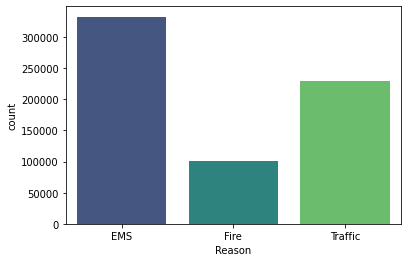

In [16]:
sns.countplot(df["Reason"],data=df, palette='coole')

In [20]:
type(df["timeStamp"].iloc[0])

str

In [21]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [22]:
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df["Hour"] = df["timeStamp"].apply(lambda time:time.hour)
df["Day of Week"] = df["timeStamp"].apply(lambda time:time.dayofweek)
df["Month"] = df["timeStamp"].apply(lambda time:time.month)
df["Year"] = df["timeStamp"].apply(lambda time:time.year)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,3,12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,3,12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,3,12,2015


In [27]:
df["Year"].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: Year, dtype: int64

In [28]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["Day of Week"] = df["Day of Week"].map(dmap)

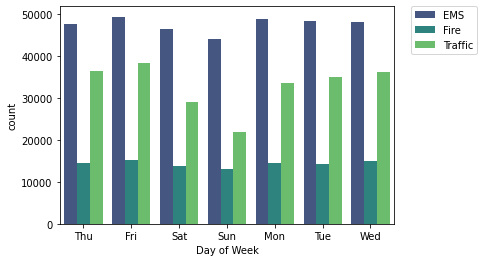

In [33]:
sns.countplot(x='Day of Week',data=df,hue="Reason",palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='Month', ylabel='count'>

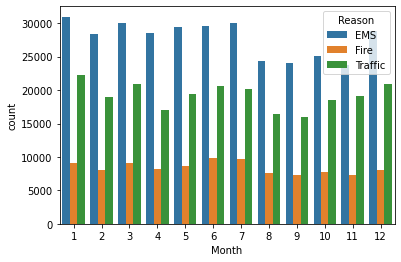

In [35]:
sns.countplot(x='Month',data=df, hue="Reason")

<AxesSubplot:xlabel='Year', ylabel='count'>

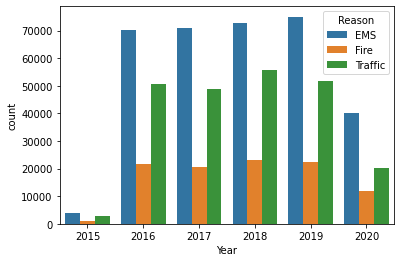

In [36]:
sns.countplot(x='Year',data=df, hue="Reason")

In [37]:
byMonth = df.groupby('Month').count()

In [38]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Year
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

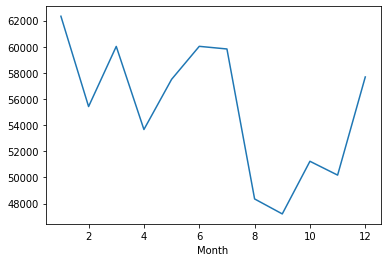

In [40]:
byMonth['Year'].plot()

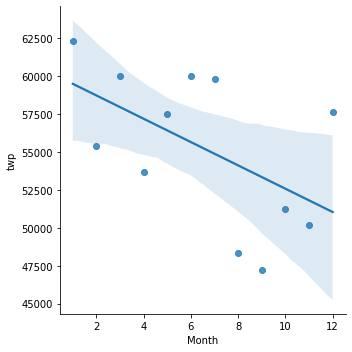

In [42]:
byMonth = byMonth.reset_index()
sns.lmplot(x='Month',y='twp',data=byMonth)

In [43]:
df["Date"] = df["timeStamp"].apply(lambda time: time.date())

<AxesSubplot:xlabel='Date'>

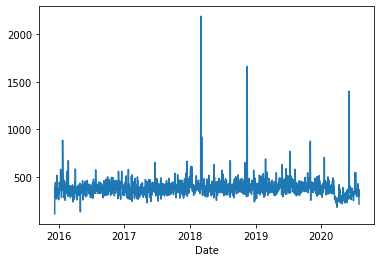

In [47]:
df.groupby("Date").count()['lat'].plot()
plt.tight_layout()

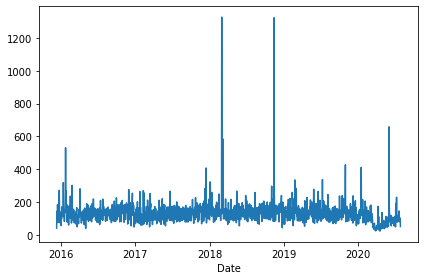

In [48]:
df[df["Reason"] == 'Traffic'].groupby("Date").count()['lat'].plot()
plt.tight_layout()

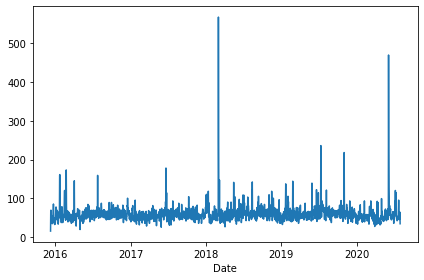

In [50]:
df[df["Reason"] == 'Fire'].groupby("Date").count()['lat'].plot()
plt.tight_layout()

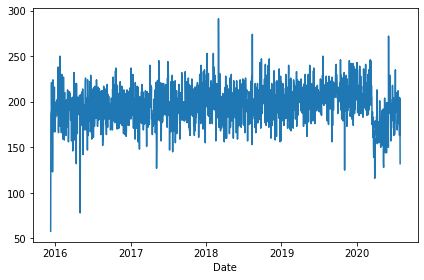

In [51]:
df[df["Reason"] == 'EMS'].groupby("Date").count()['lat'].plot()
plt.tight_layout()

In [52]:
df.groupby(by=['Day of Week','Hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                               
Fri         0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
            1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
            2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
            3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
            4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
            20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
            21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
            22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
            23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                  Reason  Month  Year  Date  
Day of Week Hour                             
Fri         0       1983   1983  1983  1983  
            1       1635   1635  1635  1635  
            2       1449   1449  1449  1449  
            3       1296   1296  1296  1296  
            4       1339   1339  1339  1339  
...                  ...    ...   ...   ...  
Wed         19      4686   4686  4686  4686  
            20      4116   4116  4116  4116  
            21      3537   3537  3537  3537  
            22      2826   2826  2826  2826  
            23      2207   2207  2207  2207  

[168 rows x 13 columns]

In [53]:
df.groupby(by=['Day of Week','Hour']).count()['Reason']

Day of Week  Hour
Fri          0       1983
             1       1635
             2       1449
             3       1296
             4       1339
                     ... 
Wed          19      4686
             20      4116
             21      3537
             22      2826
             23      2207
Name: Reason, Length: 168, dtype: int64

In [56]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

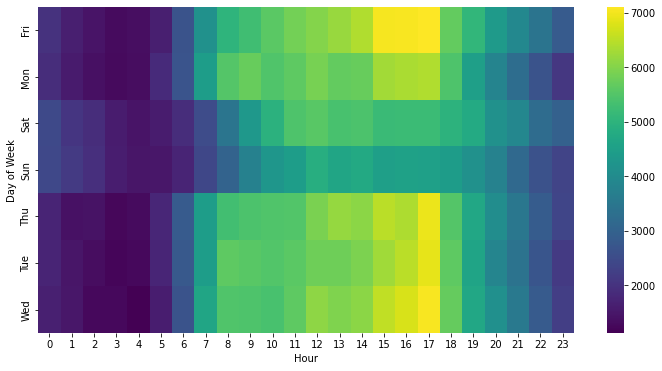

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

<Figure size 864x432 with 0 Axes>

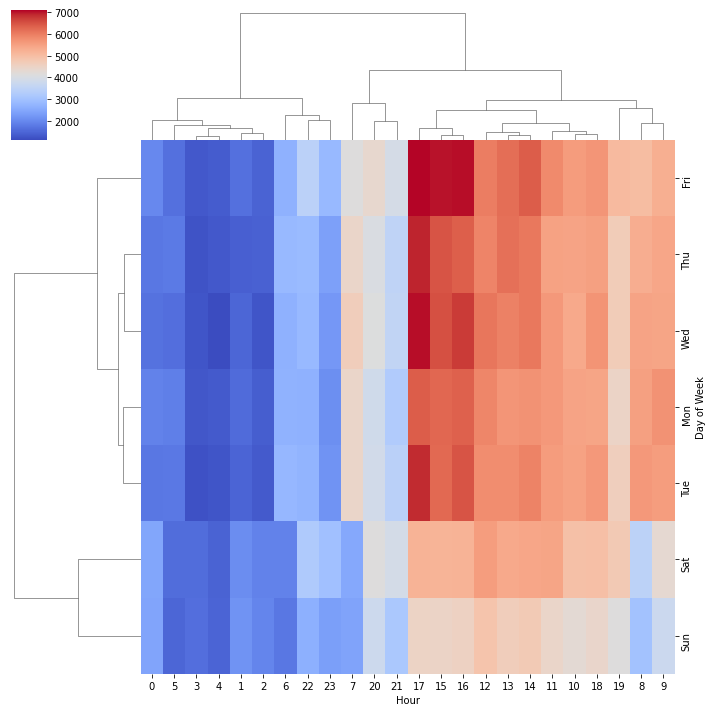

In [69]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='coolwarm')

In [64]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()["Reason"].unstack()
print(dayMonth)

Month          1     2      3     4     5     6     7     8     9     10  \
Day of Week                                                                
Fri          9309  8255  10941  7997  8904  9207  8681  7336  7694  6934   
Mon          8896  8747   8060  8410  7881  8511  9499  6854  6598  8075   
Sat          8475  7593   8050  7514  7223  8198  7748  6111  6566  6609   
Sun          7478  6452   6766  6865  6694  6837  7859  5275  5956  6316   
Thu          9055  7997   8849  7722  8740  9489  8378  7508  6954  7482   
Tue          9714  8087   8372  7561  9026  8349  9086  7291  6601  7948   
Wed          9409  8296   8989  7602  9041  9443  8581  7984  6844  7876   

Month          11    12  
Day of Week              
Fri          8379  9305  
Mon          6722  8492  
Sat          6773  8592  
Sun          5196  7165  
Thu          8358  8151  
Tue          7344  8305  
Wed          7410  7682  


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

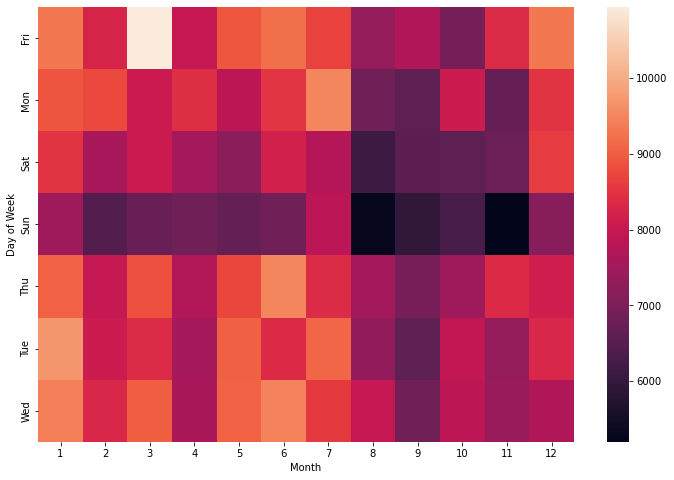

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(dayMonth)

<Figure size 864x576 with 0 Axes>

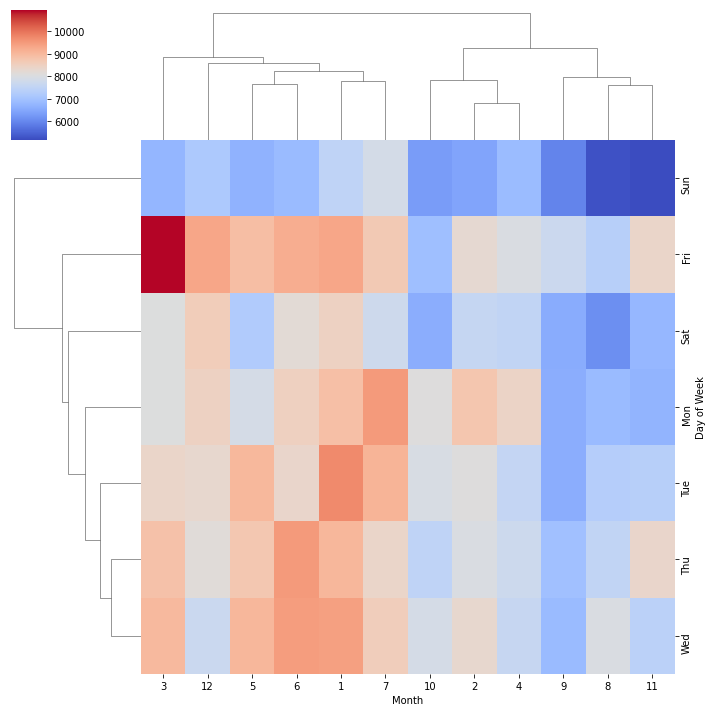

In [68]:
plt.figure(figsize=(12,8))
sns.clustermap(dayMonth, cmap="coolwarm")